In [68]:
import prospectdataset
import pandas as pd
import numpy as np
import os

In [69]:
data_folder = "./data"
meta_data_parquet_filepath = os.path.join(data_folder,"TUM_third_pool_meta_data.parquet")
ptm_meta_data_parquet_filepath = os.path.join(data_folder,"ptms.parquet")
ptm2_meta_data_parquet_filepath = os.path.join(data_folder,"ptms2.parquet")

if not os.path.exists(meta_data_parquet_filepath):
    prospectdataset.download_dataset(save_directory=data_folder, select_package="third")

In [70]:
df = pd.read_parquet(meta_data_parquet_filepath)

In [71]:
dfptm = pd.read_parquet(ptm_meta_data_parquet_filepath)
dfptm2 = pd.read_parquet(ptm2_meta_data_parquet_filepath)


In [72]:
modified_sequences = np.concatenate((
    dfptm.modified_sequence[dfptm.modified_sequence.str.contains("UNIMOD")].values,
    df.modified_sequence[df.modified_sequence.str.contains("UNIMOD")].values,
    dfptm2.modified_sequence[dfptm2.modified_sequence.str.contains("UNIMOD")].values
))

In [73]:
import re

# Pattern to match the desired substring and extract information
pattern = r"(.)(?=\[UNIMOD:(\d+)\])"

# Extracting the character and ID number from each string
results = []
for string in modified_sequences:
    match = re.search(pattern, string)
    if match:
        char = match.group(1)
        id_num = match.group(2)
        results.append(char+id_num)

In [78]:
from collections import Counter
counts = Counter(results)
counts["T5"] = 200
counts["C35"] = 200
counts["A4"] = 12000
counts["L4"] = 500
counts["A1"] = 800
counts["L45"] = 8000
counts["Z2"] = 35000



In [79]:
counts

Counter({'S21': 15846,
         'M35': 54726,
         'C4': 95097,
         'T21': 17055,
         'T5': 200,
         'C35': 200,
         'A4': 12000,
         'L4': 500,
         'A1': 800,
         'L45': 8000,
         'Z2': 35000})

In [106]:
unique_aas

['A', 'C', 'L', 'M', 'S', 'T', 'Z']

In [107]:
unique_mods

[1, 2, 4, 5, 21, 35, 45]

In [129]:
unique_aas = sorted(np.unique([k[0] for k in counts.keys()]))
unique_mods = sorted(np.unique([int(k[1:]) for k in counts.keys()]))
data = np.zeros((len(unique_aas), len(unique_mods)))

for i, aa in enumerate(unique_aas):
    for j, m in enumerate(unique_mods):
        print("Getting: ", aa, ", and ", m)
        data[j, i] = np.log(counts.get(aa+str(m), 1))
        print("putting it at: ", i, j)
        print(counts.get(aa+str(m), 0))
        print("-"*20)
data

Getting:  A , and  1
putting it at:  0 0
800
--------------------
Getting:  A , and  2
putting it at:  0 1
0
--------------------
Getting:  A , and  4
putting it at:  0 2
12000
--------------------
Getting:  A , and  5
putting it at:  0 3
0
--------------------
Getting:  A , and  21
putting it at:  0 4
0
--------------------
Getting:  A , and  35
putting it at:  0 5
0
--------------------
Getting:  A , and  45
putting it at:  0 6
0
--------------------
Getting:  C , and  1
putting it at:  1 0
0
--------------------
Getting:  C , and  2
putting it at:  1 1
0
--------------------
Getting:  C , and  4
putting it at:  1 2
95097
--------------------
Getting:  C , and  5
putting it at:  1 3
0
--------------------
Getting:  C , and  21
putting it at:  1 4
0
--------------------
Getting:  C , and  35
putting it at:  1 5
200
--------------------
Getting:  C , and  45
putting it at:  1 6
0
--------------------
Getting:  L , and  1
putting it at:  2 0
0
--------------------
Getting:  L , and  2
p

array([[ 6.68461173,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 10.46310334],
       [ 9.39266193, 11.4626527 ,  6.2146081 ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         5.29831737,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  9.67067238,
         9.74419869,  0.        ],
       [ 0.        ,  5.29831737,  0.        , 10.9100942 ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  8.98719682,  0.        ,  0.        ,
         0.        ,  0.        ]])

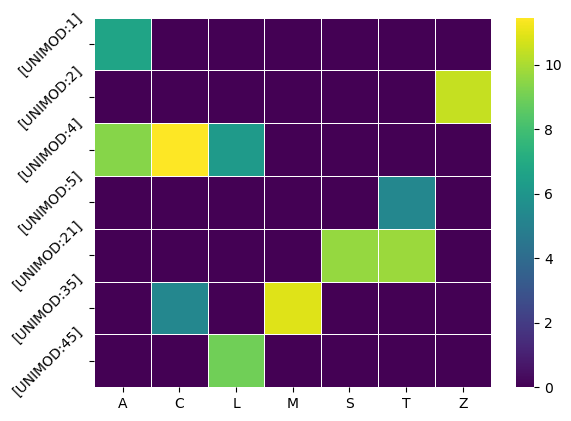

In [135]:

heatmap = sns.heatmap(data, cmap='viridis', linewidths=0.5)#, figsize=(8, 8))

#cluster.ax_heatmap.set_xticklabels(["[UNIMOD:"+x+"]" for x in unique_mods])
heatmap.set_xticklabels(unique_aas)
heatmap.set_yticklabels(["[UNIMOD:"+str(x)+"]" for x in unique_mods])

plt.yticks(rotation=45)

plt.show()